In [37]:
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()

In [38]:
# MNIST資料集是由60,000筆訓練資料、10,000筆測試資料所組成。
# reshape: 把28*28的二維資料，轉成784的一維資料。

x_Train = x_train_image.reshape(60000, 784).astype('float32')
x_Test  = x_test_image.reshape(10000, 784).astype('float32')
print(x_train_image.shape)
print(x_Train.shape)

x_Train_normalize = x_Train / 255
x_Test_normalize  = x_Test / 255

(60000, 28, 28)
(60000, 784)


In [39]:
#x_Train_normalize[0]




In [40]:
y_Train_OneHot = np_utils.to_categorical(y_train_label)
y_Test_OneHot = np_utils.to_categorical(y_test_label)
print('before one hot encoding:\n{}'.format(y_train_label))
print('after one hot encoding:\n{}'.format(y_Train_OneHot))

before one hot encoding:
[5 0 4 ... 5 6 8]
after one hot encoding:
[[0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]]


In [92]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()

'''model.add(Dense(units=256, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))
                '''
model.add(Dense(units=64, 
                input_dim=784, 
                kernel_initializer='normal', 
                activation='relu'))

model.add(Dense(units=10, 
                kernel_initializer='normal', 
                activation='softmax'))
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_8 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________
None


In [93]:
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

train_history=model.fit(x=x_Train_normalize,
                        y=y_Train_OneHot,
                        validation_split=0.2, 
                        epochs=10,
                        batch_size=200,
                        verbose=2)

Epoch 1/10
240/240 - 1s - loss: 0.6699 - accuracy: 0.8365 - val_loss: 0.3093 - val_accuracy: 0.9153
Epoch 2/10
240/240 - 0s - loss: 0.2896 - accuracy: 0.9183 - val_loss: 0.2462 - val_accuracy: 0.9304
Epoch 3/10
240/240 - 0s - loss: 0.2356 - accuracy: 0.9327 - val_loss: 0.2102 - val_accuracy: 0.9416
Epoch 4/10
240/240 - 0s - loss: 0.2010 - accuracy: 0.9420 - val_loss: 0.1914 - val_accuracy: 0.9466
Epoch 5/10
240/240 - 0s - loss: 0.1762 - accuracy: 0.9489 - val_loss: 0.1732 - val_accuracy: 0.9502
Epoch 6/10
240/240 - 0s - loss: 0.1572 - accuracy: 0.9544 - val_loss: 0.1590 - val_accuracy: 0.9557
Epoch 7/10
240/240 - 0s - loss: 0.1401 - accuracy: 0.9599 - val_loss: 0.1535 - val_accuracy: 0.9543
Epoch 8/10
240/240 - 0s - loss: 0.1274 - accuracy: 0.9626 - val_loss: 0.1424 - val_accuracy: 0.9586
Epoch 9/10
240/240 - 0s - loss: 0.1154 - accuracy: 0.9662 - val_loss: 0.1354 - val_accuracy: 0.9606
Epoch 10/10
240/240 - 0s - loss: 0.1041 - accuracy: 0.9695 - val_loss: 0.1283 - val_accuracy: 0.9627

In [94]:
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()


In [95]:
#show_train_history(train_history,'acc','val_acc')
train_history.history.keys()

dict_keys(['val_loss', 'loss', 'accuracy', 'val_accuracy'])

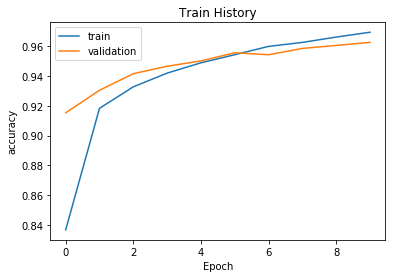

In [96]:
show_train_history(train_history,'accuracy','val_accuracy')

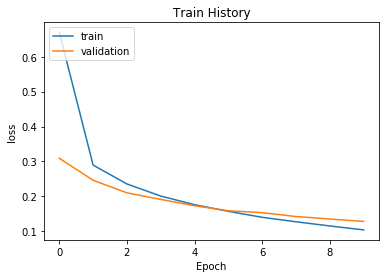

In [97]:
show_train_history(train_history,'loss','val_loss')

In [98]:
scores = model.evaluate(x_Test_normalize, y_Test_OneHot)
print()
print('accuracy=',scores[1])
scores

313/313 [==============================] - 0s 938us/step - loss: 0.1236 - accuracy: 0.9647

accuracy= 0.9646999835968018


[0.12361477315425873, 0.9646999835968018]

In [99]:
prediction = model.predict_classes(x_Test)

In [100]:
prediction = np.argmax(model.predict(x_Test), axis=-1)

In [101]:
prediction

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [102]:
import matplotlib.pyplot as plt
def plot_images_labels_prediction(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: 
        num = 25 
    for i in range(0, num):
        ax=plt.subplot(5, 5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        
        ax.set_title('label={}, predict={}'.format(labels[idx], prediction[idx]), fontsize=10)
        ax.set_xticks([]);
        ax.set_yticks([])        
        idx += 1 
    plt.show()

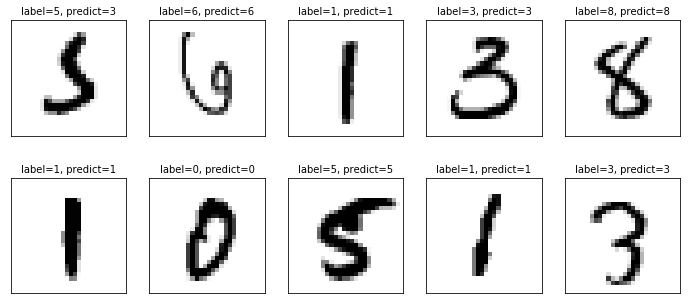

In [109]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction,idx=340)

In [110]:
import pandas as pd
pd.crosstab(y_test_label, prediction, rownames=['label'],colnames=['predict'])

predict,0,1,2,3,4,5,6,7,8,9
label,,,,,,,,,,
0,965,0,0,4,0,4,6,0,1,0
1,0,1113,4,1,0,1,5,1,10,0
2,9,1,998,8,0,0,6,5,4,1
3,0,0,7,984,0,1,0,8,8,2
4,2,0,4,1,941,0,15,3,4,12
5,8,2,0,26,2,832,12,1,6,3
6,7,3,2,0,3,4,936,0,3,0
7,2,4,17,15,2,1,0,971,2,14
8,6,0,2,12,4,4,8,4,932,2


In [105]:
df = pd.DataFrame({'label':y_test_label, 'predict':prediction})
df[:2]

,label,predict
0,7,7
1,2,2


In [106]:
df[(df.label==5)&(df.predict==3)]

,label,predict
340,5,3
412,5,3
1003,5,3
1082,5,3
1393,5,3
1970,5,3
2035,5,3
2526,5,3
2545,5,3
2604,5,3


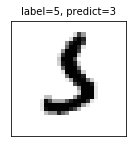

In [111]:
plot_images_labels_prediction(x_test_image,y_test_label, prediction,idx=340,num=1)

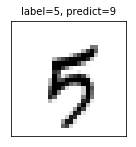

In [112]:
plot_images_labels_prediction(x_test_image,y_test_label, prediction,idx=1289,num=1)